In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions


In [ ]:
!gdown --id 11fQl95IRQIyURYYw4_fZuxHN9dpH1PgP

!gdown --id 1Qt6Cj_eswTVsa-oO0g841-GxrL6twYfX

Downloading...
From: https://drive.google.com/uc?id=11fQl95IRQIyURYYw4_fZuxHN9dpH1PgP
To: /content/toy_dataset.txt
100% 22.9k/22.9k [00:00<00:00, 8.72MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qt6Cj_eswTVsa-oO0g841-GxrL6twYfX
To: /content/ushape.csv
100% 2.88k/2.88k [00:00<00:00, 4.62MB/s]


In [ ]:
df = pd.read_csv('./toy_dataset.txt')
df = df.set_index('ID')

#encode label like categories

le = LabelEncoder()
le = le.fit(df.categorie)
encoded_var = le.transform(df.categorie)
categorie = df.categorie
df.drop('categorie', axis = 1, inplace = True)

In [ ]:
df

,Gradi,Eta,Sesso,tipi_di_pdf,Codice_Regione
ID,,,,,
ID1,generale,19,0,western,11
ID2,colonnello,31,0,sci-fi,10
ID3,colonnello,29,1,fantascientifico,12
ID4,colonnello,32,0,sci-fi,17
ID5,colonnello,54,0,romantico,19
...,...,...,...,...,...
ID395,aviere,38,0,western,19
ID396,aviere,29,1,sci-fi,17
ID397,aviere,46,0,sci-fi,5


In [ ]:
df['Eta'] = (df['Eta'] - df['Eta'].min()) / (df['Eta'].max() - df['Eta'].min())
categorical_cols = ['Gradi','tipi_di_pdf', 'Codice_Regione']
df = pd.get_dummies(df, columns = categorical_cols)


In [ ]:
df

,Eta,Sesso,Gradi_aviere,Gradi_colonnello,Gradi_generale,Gradi_luogotenente,Gradi_maggiore,Gradi_maresciallo,Gradi_primo aviere,Gradi_sergente,Gradi_sottotenente,Gradi_tenente,Gradi_tenente colonnello,tipi_di_pdf_azione,tipi_di_pdf_fantascientifico,tipi_di_pdf_fantasy,tipi_di_pdf_romantico,tipi_di_pdf_sci-fi,tipi_di_pdf_thriller,tipi_di_pdf_western,Codice_Regione_1,Codice_Regione_2,Codice_Regione_3,Codice_Regione_4,Codice_Regione_5,Codice_Regione_6,Codice_Regione_7,Codice_Regione_8,Codice_Regione_9,Codice_Regione_10,Codice_Regione_11,Codice_Regione_12,Codice_Regione_13,Codice_Regione_14,Codice_Regione_15,Codice_Regione_16,Codice_Regione_17,Codice_Regione_18,Codice_Regione_19,Codice_Regione_20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID1,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ID2,0.230769,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
ID3,0.192308,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
ID4,0.250000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ID5,0.673077,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID395,0.365385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ID396,0.192308,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ID397,0.519231,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
component_ana = SpectralEmbedding(n_components=2)
X_transformed = component_ana.fit_transform(df)
X_transformed.shape
X_df = pd.DataFrame(X_transformed, columns = ['first_dimensionality', 'second_dimensionality'])

X_df['y'] = [x for x in encoded_var]


In [ ]:
X_df

,first_dimensionality,second_dimensionality,y
0,-0.008652,-0.001803,2
1,-0.010597,-0.009948,0
2,0.010429,0.003678,2
3,-0.009649,-0.011263,3
4,-0.009183,-0.009864,2
...,...,...,...
394,-0.011019,-0.004868,2
395,0.005289,-0.007106,2
396,-0.012242,-0.004124,2
397,-0.010529,-0.004156,1


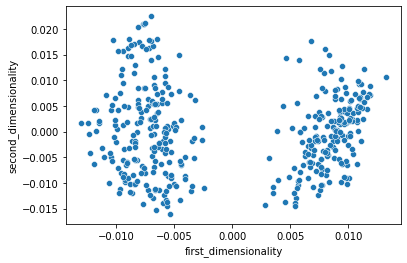

In [ ]:
sns.scatterplot(data = X_df, x = 'first_dimensionality', y = 'second_dimensionality')

In [ ]:
df_3 = pd.read_csv('./ushape.csv') 

In [ ]:
df_3

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0
...,...,...,...
95,1.7000,0.5880,1.0
96,0.2190,-0.6530,1.0
97,0.9530,-0.4200,1.0
98,-1.3200,0.4230,0.0


In [ ]:
X_df.iloc[:,:2] * 1000

,first_dimensionality,second_dimensionality
0,-2.553908,-9.364888
1,8.948720,-1.746036
2,-3.626436,-10.688361
3,-13.166782,2.737606
4,-1.545724,-9.901079
...,...,...
394,-4.591800,-11.151367
395,-7.186805,-13.818663
396,-7.539063,-13.384052
397,0.233106,10.878328


In [ ]:
def plot_knn(data, k):
  x = data.iloc[:,:2] * 1000
  x = x.values
  y = data['y'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(x, y)
  plot_decision_regions(x, y, clf=clf, legend=2)
  plt.show()



# x = X_df.iloc[:,:2] * 1000
# x = x.values
# y = y = df['y'].astype(int).values

# clf = neighbors.KNeighborsClassifier(n_neighbors=15)
# clf.fit(x, y)
# plot_decision_regions(x, y, clf=clf, legend=2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


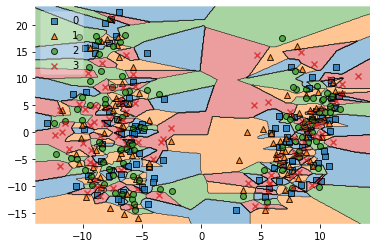

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


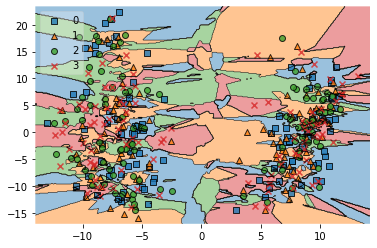

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


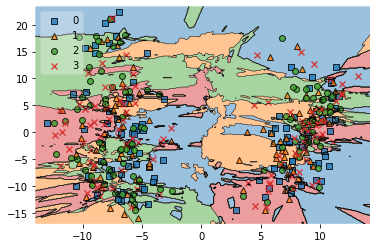

In [ ]:
for i in [1,5,20]:
  plot_knn(X_df, i)

In [ ]:
yy.ravel().shape

(22500,)

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, 'distance')
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

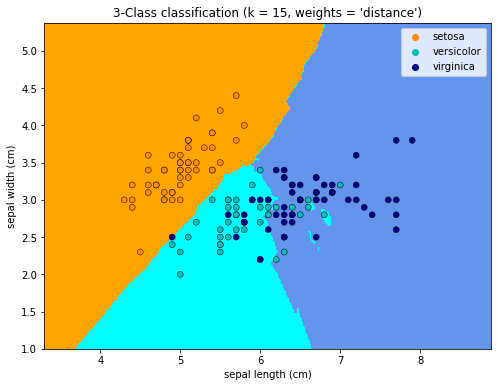

In [ ]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, 'distance')
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

In [ ]:
yy.ravel()

array([1.  , 1.  , 1.  , ..., 5.38, 5.38, 5.38])